# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_df = pd.read_csv("Iris.csv")
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
138,139,6.0,3.0,4.8,1.8,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
49,50,5.0,3.3,1.4,0.2,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [3]:
iris_df.describe() #data understanding

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.isnull() #checking for missing values.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [5]:
iris_df.isna() #checking ofr missing values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


## Answer 2

#### Since isnull() and isna() is false for all rows, the given dataset does'nt contain missing values

In [6]:
#Calculate the number of missing values per column
print((iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]==0).sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


## Fill missing values with median of that particular column

In [7]:
iris_df['SepalLengthCm']=iris_df['SepalLengthCm'].fillna(value=iris_df['SepalLengthCm'].median())
iris_df['SepalWidthCm']=iris_df['SepalWidthCm'].fillna(value=iris_df['SepalWidthCm'].median())
iris_df['PetalLengthCm']=iris_df['PetalLengthCm'].fillna(value=iris_df['PetalLengthCm'].median())
iris_df['PetalWidthCm']=iris_df['PetalWidthCm'].fillna(value=iris_df['PetalWidthCm'].median())

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #instantiating LabelEncoder Object
iris_df['Species']=le.fit_transform(iris_df['Species'])
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [9]:
iris_df.corr() #No column to be dropped except id as no value

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [10]:
iris_df.var() #No column to be dropped except id as no value

Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
Species             0.671141
dtype: float64

### Dropping id column

In [11]:
iris_df=iris_df.drop(labels = "Id", axis = 1)

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

D:\Programming\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programming\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


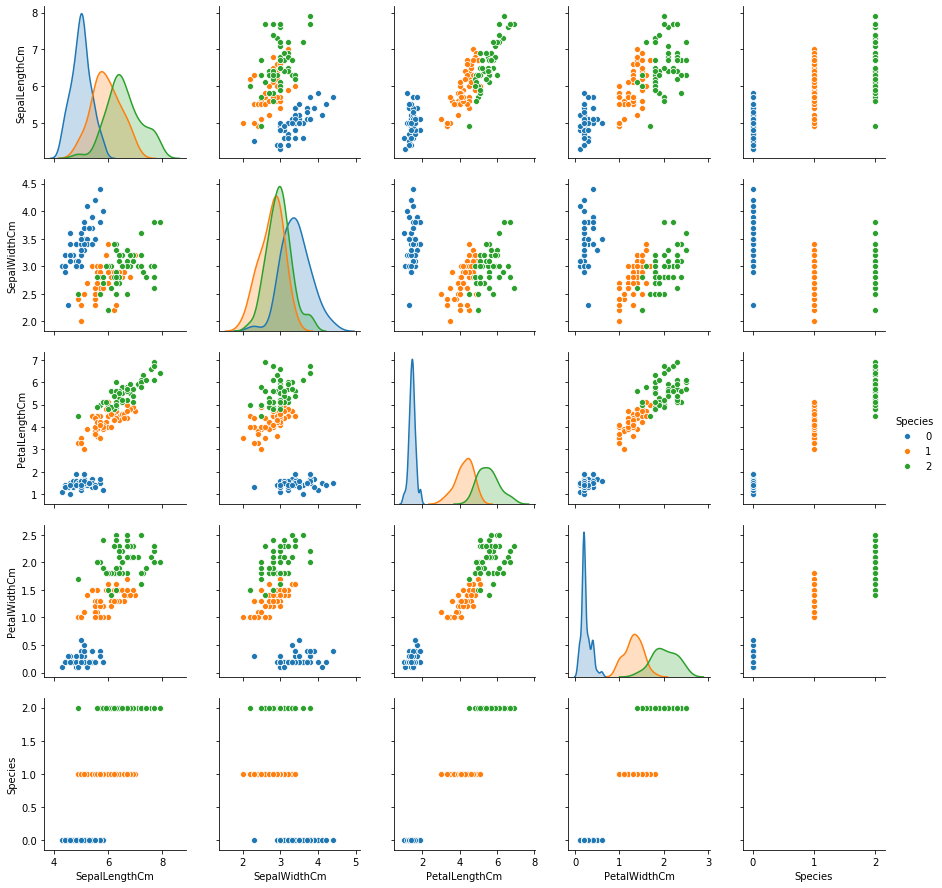

In [12]:
sns.pairplot(iris_df,hue='Species')

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [13]:
# Creating a separate dataframe consisting only the features i.e independent attributes
iris_feature_df = iris_df.drop(labels= "Species" , axis = 1)
# Capturing the class values from the 'Species' column into a pandas series 
iris_labels= iris_df['Species']
# storing independent variables into np array 
X = np.array(iris_feature_df)
# storing iris_labels data into a separate np array
y = np.array(iris_labels)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1) #Spliting the dataset in 80:20 ratio

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# creating list of K for KNN
k = [3,5,9]

# performing in loop
for i in k:
    KNN = KNeighborsClassifier(n_neighbors= i) #instantiating KNN algorithm of sklearn
    KNN.fit(X_train,y_train) #builing model
    y_predict = KNN.predict(X_test) #testing built model
    print('k::',i,' ','Accuracy_Score::',accuracy_score(y_test,y_predict))

k:: 3   Accuracy_Score:: 1.0
k:: 5   Accuracy_Score:: 1.0
k:: 9   Accuracy_Score:: 0.9666666666666667


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [17]:
# creating list of K for KNN
k = list(range(1,20,2))

# empty list that will hold accuracy scores
acc_scores = []

# performing in loop
for i in k:
    KNN = KNeighborsClassifier(n_neighbors= i) #instantiating KNN algorithm of sklearn
    KNN.fit(X_train,y_train) #builing model
    y_predict = KNN.predict(X_test) #testing built model
    #print('k::',i,' ','Accuracy_Score::',accuracy_score(y_test,y_predict))
    acc_scores.append(accuracy_score(y_test,y_predict))
    
MSE = [x for x in acc_scores]
max(MSE)
MSE.index(max(MSE))
best_k = k[MSE.index(max(MSE))]
print('The optimal number of neighbors is %d' % best_k)

The optimal number of neighbors is 1


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

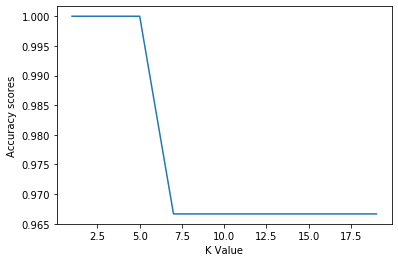

In [18]:
plt.plot(k, acc_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy scores')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [19]:
bc_df=pd.read_csv('bc2.csv')
bc_df.sample(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
656,1330361,5,1,1,1,2,1,2,1,1,2
661,1339781,4,1,1,1,2,1,3,1,1,2
632,1238777,1,1,1,1,2,1,1,1,1,2
485,1002025,1,1,1,3,1,3,1,1,1,2
493,1142706,5,10,10,10,6,10,6,5,2,4
369,428598,1,1,3,1,1,1,2,1,1,2
492,1133991,4,1,1,1,1,1,2,1,1,2
155,1192325,5,5,5,6,3,10,3,1,1,4
344,822829,7,6,4,8,10,10,9,5,3,4
346,830690,5,2,2,2,3,1,1,3,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [20]:
bc_df.shape[0]

699

In [21]:
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [22]:
bc_df.describe

<bound method NDFrame.describe of           ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025               5          1           1                  1   
1    1002945               5          4           4                  5   
2    1015425               3          1           1                  1   
3    1016277               6          8           8                  1   
4    1017023               4          1           1                  3   
..       ...             ...        ...         ...                ...   
694   776715               3          1           1                  1   
695   841769               2          1           1                  1   
696   888820               5         10          10                  3   
697   897471               4          8           6                  4   
698   897471               4          8           8                  5   

     Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  \
0           

#### Check Missing Values

In [23]:
bc_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [24]:
(bc_df['Bare Nuclei']=='?').sum()

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [25]:
top=bc_df['Bare Nuclei'].describe(include=all)[2] #finding top value
bc_df['Bare Nuclei'].replace(to_replace='?',value=top,inplace=True) #replacing '?' with top
(bc_df['Bare Nuclei']=='?').sum() #checking

0

### Question 5
#### Find the distribution of target variable (Class) 

In [26]:
bc_df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [27]:
bc_df.Class.value_counts(normalize=True)

2    0.655222
4    0.344778
Name: Class, dtype: float64

#### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1BD724C08>]],
      dtype=object)

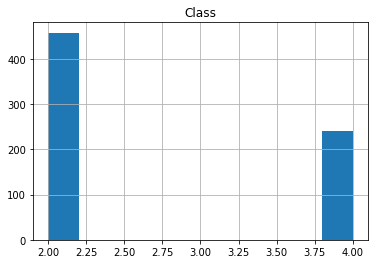

In [28]:
bc_df.hist(column='Class')

#### Convert the datatype of Bare Nuclei to `int`

In [29]:
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('int')
bc_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

D:\Programming\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programming\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


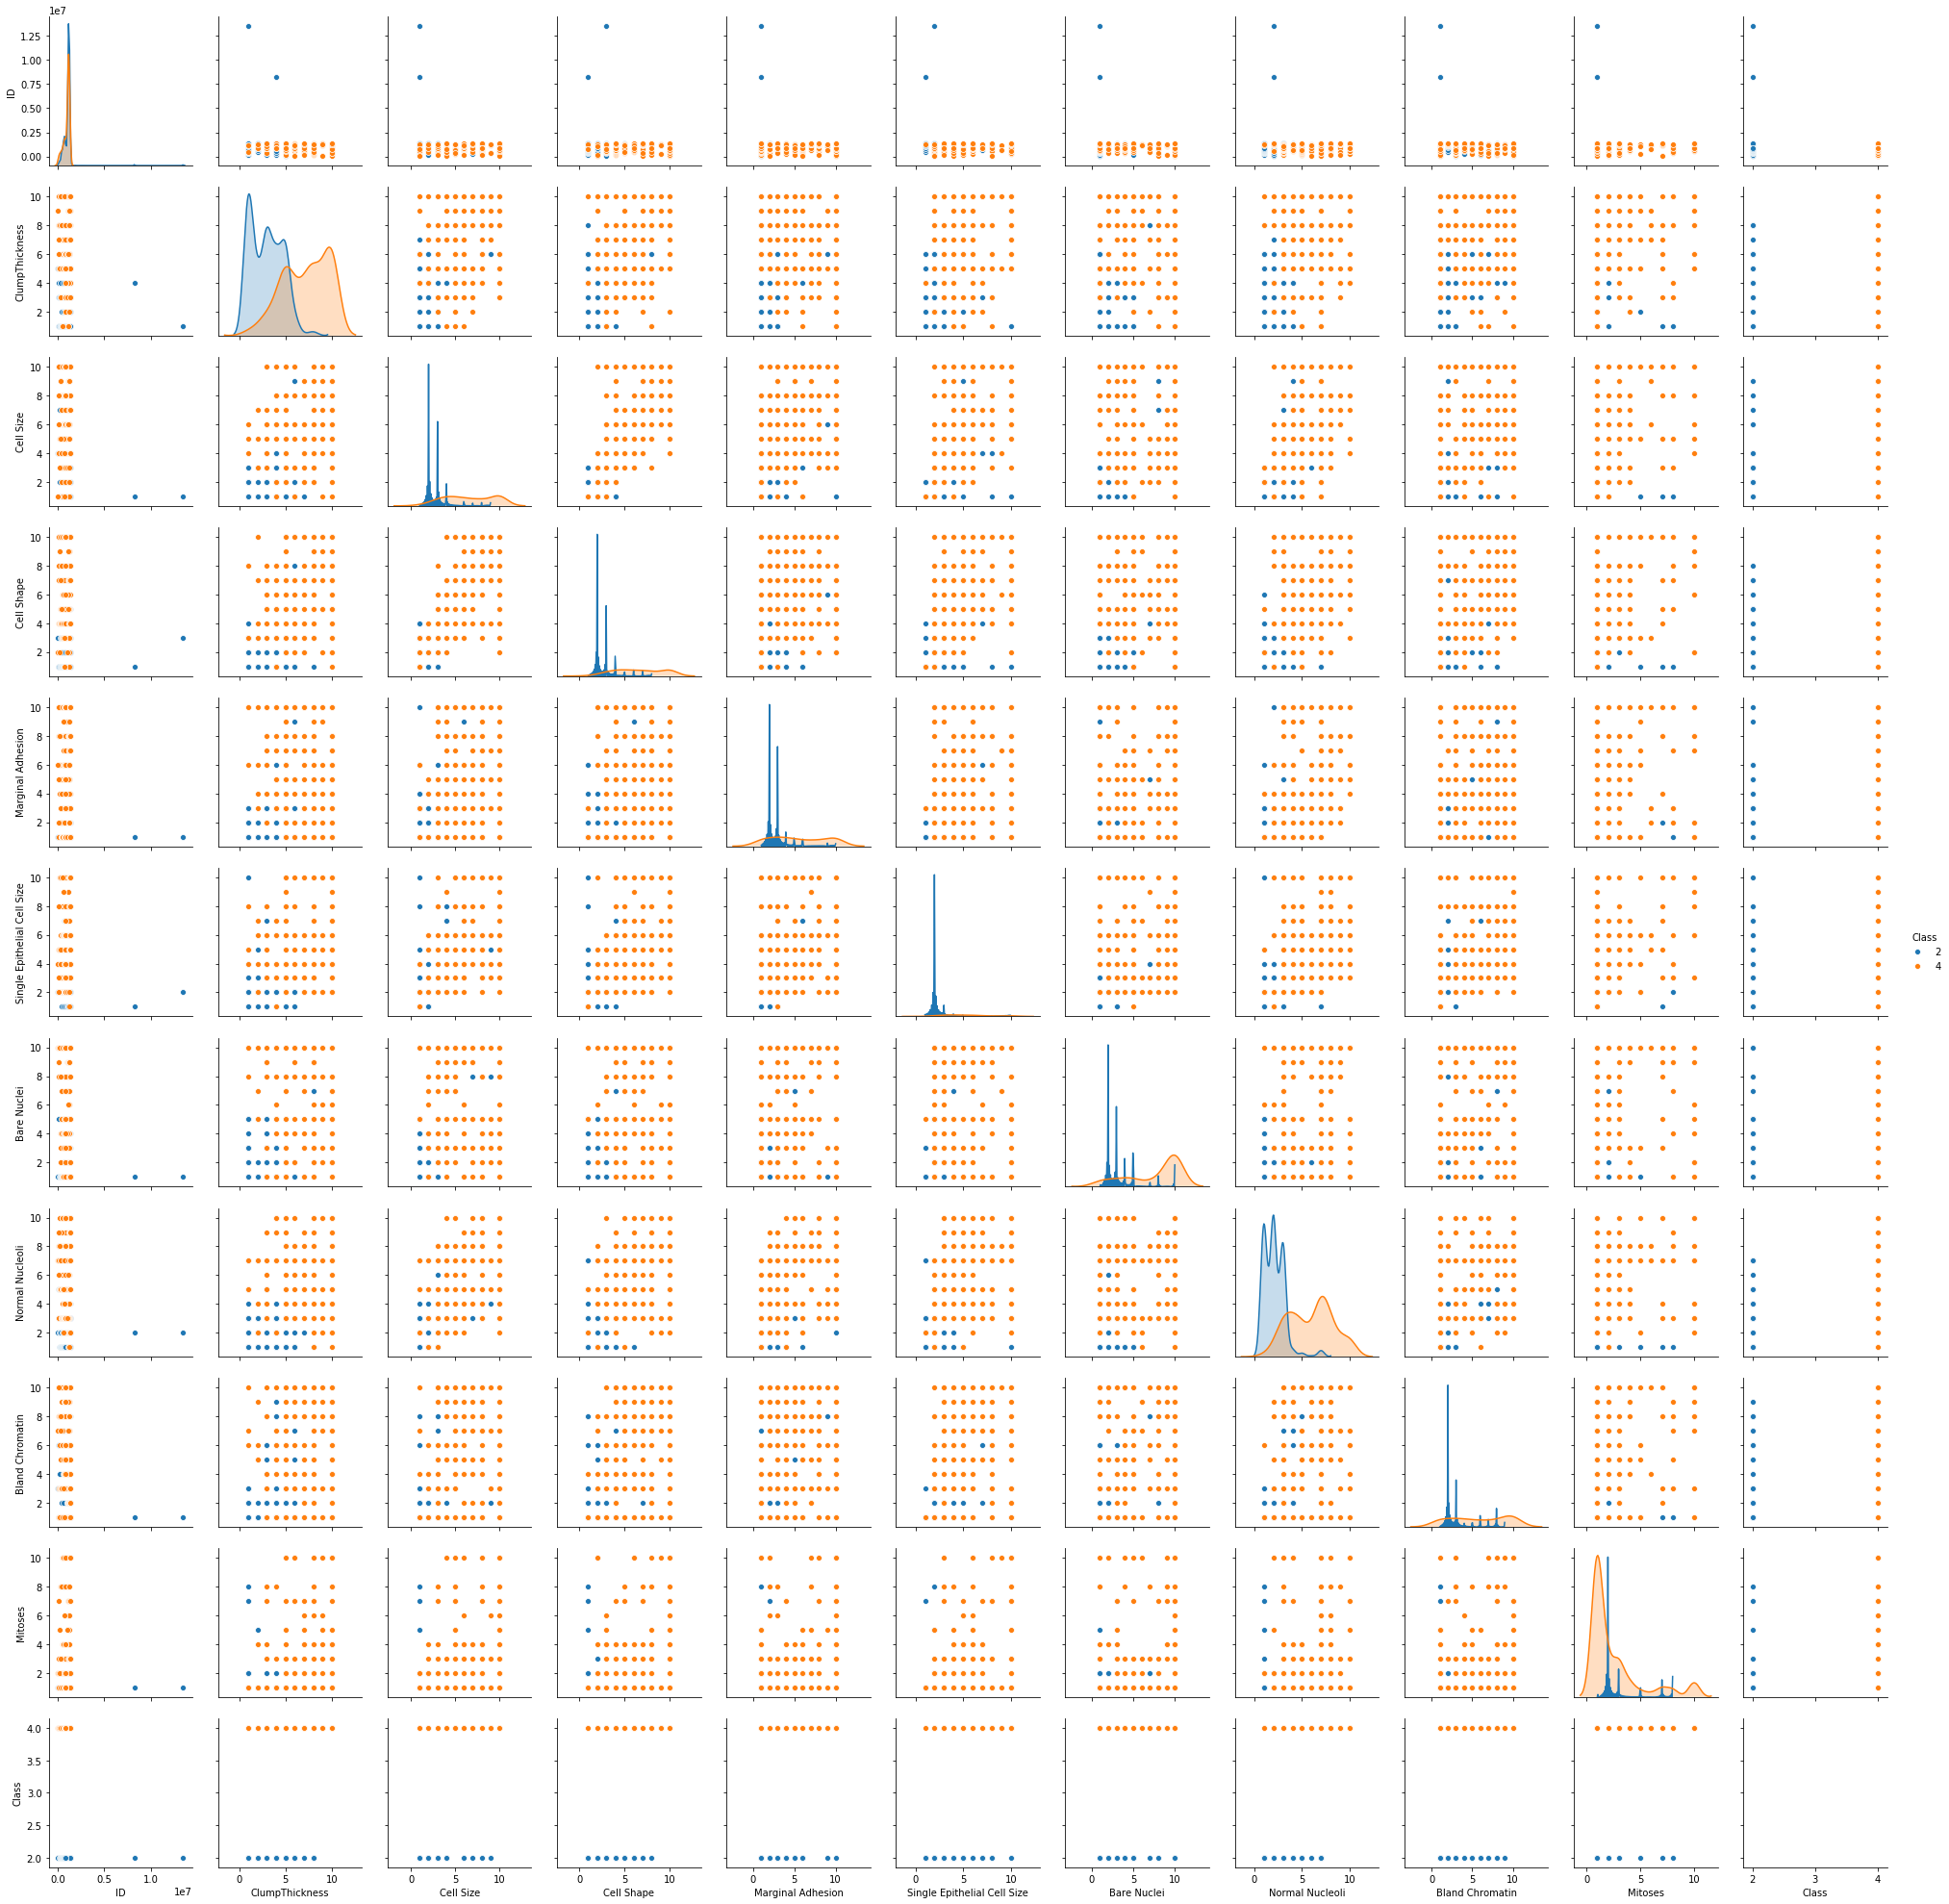

In [30]:
sns.pairplot(bc_df,hue='Class')

## Scale the data

### Question 7
Standardize the data

Hint: use **StandardScaler()**

In [31]:
# Creating a separate dataframe consisting only the features i.e independent attributes
bc_feature_df = bc_df.drop(["ID","Class","Cell Shape"], axis = 1)
# Capturing the class values from the 'Class' column into a pandas series akin to array 
bc_labels= bc_df['Class']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(bc_feature_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
scaled_features = scaler.transform(bc_feature_df)

In [36]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7
0,0.206936,-0.699995,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


## Train test split

### Question 8
#### Divide the dataset into feature set and target set

In [37]:
# storing independent variables into np array 
X = np.array(scaled_features)
# storing iris_labels data into a separate np array
y = np.array(bc_labels)

#### Divide the Training and Test sets in 70:30 

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) #Spliting the dataset in 70:30 ratio

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# creating list of K for KNN
k = [3,5,9]

# performing in loop
for i in k:
    KNN = KNeighborsClassifier(n_neighbors= i) #instantiating KNN algorithm of sklearn
    KNN.fit(X_train,y_train) #builing model
    y_predict = KNN.predict(X_test) #testing built model
    print('k::',i,' ','Accuracy_Score::',accuracy_score(y_test,y_predict))

k:: 3   Accuracy_Score:: 0.9619047619047619
k:: 5   Accuracy_Score:: 0.9809523809523809
k:: 9   Accuracy_Score:: 0.9619047619047619


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [41]:
# creating list of K for KNN
k = list(range(1,20,2))

# empty list that will hold accuracy scores
acc_scores = []

# performing in loop
for i in k:
    KNN = KNeighborsClassifier(n_neighbors= i) #instantiating KNN algorithm of sklearn and assigning k-value
    KNN.fit(X_train,y_train) #builing model
    y_predict = KNN.predict(X_test) #testing built model
    acc_scores.append(accuracy_score(y_test,y_predict))
    
MSE = [x for x in acc_scores]
max(MSE)
MSE.index(max(MSE))
best_k = k[MSE.index(max(MSE))]
print('The optimal number of neighbors is %d' % best_k)

The optimal number of neighbors is 5


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

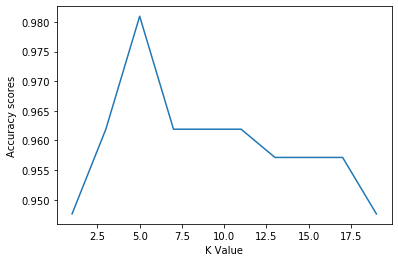

In [42]:
plt.plot(k, acc_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy scores')
plt.show()